In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
NBA_df = pd.read_csv('Seasons_Stats.csv')

1. Определите игрока, принявшего участие в наибольшем числе игр.

In [13]:
NBA_df[(NBA_df['G'] == NBA_df['G'].max())]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2676,2676,1969.0,Walt Bellamy*,C,29.0,TOT,88.0,NaN,3159.0,18.0,...,0.649,NaN,NaN,1101.0,176.0,NaN,NaN,NaN,320.0,1527.0


2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [26]:
NBA_df[['Age','G']].corr(method ='pearson')

,Age,G
Age,1.000000,0.027398
G,0.027398,1.000000


In [25]:
NBA_df[['Age','G']].corr(method ='spearman')

,Age,G
Age,1.000000,0.038425
G,0.038425,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>]], dtype=object)

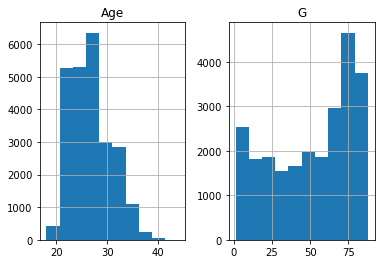

In [27]:
NBA_df[['Age','G']].hist()

In [30]:
from scipy.stats import pearsonr
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]
NBA_df[['Age','G']].corr(method =pearsonr_pval)

,Age,G
Age,1.000000,0.000017
G,0.000017,1.000000


3. Определите год, в котором наиболее интенсивно играли в баскетбол

In [36]:
NBA_df['Year'].value_counts().index[0]

2015.0

4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).

In [60]:
Pos_df = NBA_df.groupby('Pos', as_index = False)['PTS'].mean()
print(Pos_df.max())
print(Pos_df.min())

Pos    SG-SF
PTS     1152
dtype: object
Pos          C
PTS    90.0569
dtype: object


In [58]:
print(Pos_df.max())
print(Pos_df.min())

Pos    SG-SF
PTS     1152
dtype: object
Pos          C
PTS    90.0569
dtype: object


5. Постройте гистограмму по признаку Year

<AxesSubplot:>

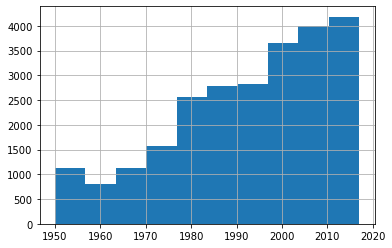

In [61]:
NBA_df['Year'].hist()

6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [105]:
print(NBA_df.shape[0])

24691


In [106]:
NBA_df = NBA_df[NBA_df.isnull().sum(axis = 1) == NBA_df.isnull().sum(axis = 1).min()]

In [107]:
print(NBA_df.shape[0])

14585


7. Добавьте в набор данных признак, являющийся произведением двух других признаков.


In [108]:
NBA_df['proizv'] = NBA_df['Year'] + NBA_df['Age']
NBA_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,proizv
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,2011.0
5748,5748,1980.0,Larry Bird*,PF,23.0,BOS,82.0,82.0,2955.0,20.5,...,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0,2003.0
5781,5781,1980.0,M.L. Carr,SF,29.0,BOS,82.0,7.0,1994.0,14.6,...,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0,2009.0
5786,5786,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,...,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0,2013.0
5802,5802,1980.0,Dave Cowens*,C,31.0,BOS,66.0,55.0,2159.0,14.8,...,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,...,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0,2045.0
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,2041.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,2044.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,2039.0


8. Определите самое популярное имя среди игроков.

In [109]:
NBA_df['Player'].value_counts().index[0]

'Gerald Henderson'